# Chapter 6: Homomorphic Encryption NN

| Chapter  | Colab   | Kaggle          | Gradient      | Studio Lab             | Binder             |
|:---------|:--------|:----------------|:--------------|:-----------------------|:-------------------|
| [Chapter 6: Homomorphic Encryption NN](6_more_state_of_the_art_research_questions/Chapter_6_Homomorphic_Encryption_NN.ipynb)               | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/matthew-mcateer/practicing_trustworthy_machine_learning/blob/main/6_more_state_of_the_art_research_questions/Chapter_6_Homomorphic_Encryption_NN.ipynb)          | [![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/matthew-mcateer/practicing_trustworthy_machine_learning/blob/main/6_more_state_of_the_art_research_questions/Chapter_6_Homomorphic_Encryption_NN.ipynb)          | [![Gradient](https://assets.paperspace.io/img/gradient-badge.svg)](https://console.paperspace.com/github/matthew-mcateer/practicing_trustworthy_machine_learning/blob/main/6_more_state_of_the_art_research_questions/Chapter_6_Homomorphic_Encryption_NN.ipynb)          | [![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/matthew-mcateer/practicing_trustworthy_machine_learning/blob/main/6_more_state_of_the_art_research_questions/Chapter_6_Homomorphic_Encryption_NN.ipynb)          | [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/matthew-mcateer/practicing_trustworthy_machine_learning/HEAD?urlpath=https%3A%2F%2Fgithub.com%2Fmatthew-mcateer%2Fpracticing_trustworthy_machine_learning%2Fblob%2Fmain%2F6_more_state_of_the_art_research_questions%2FChapter_6_Homomorphic_Encryption_NN.ipynb)          |

The contents of this notebook combine materials from the book ["Practicing Trustworthy Machine Learning"](https://www.oreilly.com/library/view/practicing-trustworthy-machine/9781098120269/), and the [ODSC West 2022](https://odsc.com/california/) Presentation promoting said book. Much of the plain text follows that presentation.

<!--
Originally found on GitHub at https://github.com/matthew-mcateer/practicing_trustworthy_machine_learning/blob/main/6_more_state_of_the_art_research_questions/Chapter_6_Homomorphic_Encryption_NN.ipynb
-->

Acknowledgements:

* Ayoub Benaissa - Twitter: [@y0uben11](https://twitter.com/y0uben11)
* Bogdan Cebere - Twitter: [@bcebere](https://twitter.com/bcebere)
* Bilal Retiat - Twitter: [@philomath213](https://twitter.com/philomath213)

Oh, and Alexander Ziller,
Andrew Trask,
Antonio Lopardo,
Benjamin Szymkow,
Bobby Wagner,
Emma Bluemke,
Jean-Mickael Nounahon,
Jonathan Passerat-Palmbach,
Kritika Prakash,
Nick Rose,
Théo Ryffel,
Zarreen Naowal Reza,
and Georgios Kaissis, **along with the rest of the OpenMined community**


So, privacy is a big concern in machine learning.

You usually need a lot of data.

While there are plenty of ways to lock up and secure your data to restrict access, the data itself usually needs to be exposed in some way to the model in order for it to learn.

Now, what if you could keep the data locked up or encrypted, while still letting the ML model learn the patterns it needs to.

This is the promise behind **homomorphically encrypted machine learning**.

Now, there is a lot in this phrase, so let's break it down.

## Part 1: What is a homomorphism?

A homomorphism is a structure-preserving map between two algebraic structures of the same type (such as two groups, two rings, or two vector spaces). ([Wikipedia](https://en.wikipedia.org/wiki/Homomorphism))

A homomorphism is a map between two algebraic structures of the same type (that is of the same name), that preserves the operations of the structures. This means a map $f:A\to B$ between two sets $A$, $B$ equipped with the same structure such that, if the operation $🔴$ is an operation of the structure (supposed here, for simplification, to be a binary operation), then

$$f(x 🔴 y)=f(x)🔴 f(y)$$

for every pair $ x$, $ y$ of elements of $A$.[note 1] One says often that $f$ preserves the operation or is compatible with the operation.

The operations that must be preserved by a homomorphism include 0-ary operations, that is the constants. In particular, when an identity element is required by the type of structure, the identity element of the first structure must be mapped to the corresponding identity element of the second structure.

So, if the operation is preserved, including the identity operation (e.g., multiplying by 1 for multiplication, adding 0 for addition), this is a homomorphism.

https://graphik-team.github.io/graal/doc/homomorphism-module

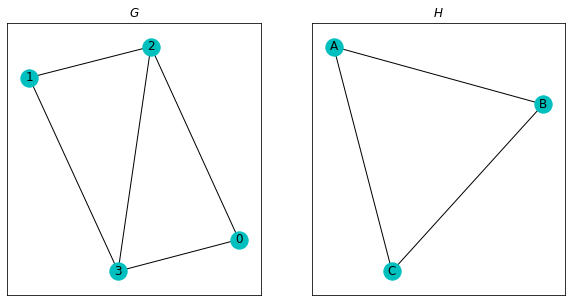

In [ ]:
#@title homomorphism visualization { display-mode: "form" }

# https://github.com/marcin-serwin/cographs/blob/9ba0fd53ec39550049e778da32028861ec932a01/cographs/utilities.py
# https://github.com/RCSimpson/Thesis/blob/239c1f2abe2577d9934aece7dddc20b53d58a225/Motifs/motifVisualization.py
# https://networkx.org/documentation/stable/reference/algorithms/isomorphism.html

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# A collection of Python functions to generate examples of definitions pertinent to the Thesis.

# ======================================================================================================================
# Homomorphism Example
# ======================================================================================================================

def homomorphism():
    labels = {}
    labels[0] = 'A'
    labels[1] = 'B'
    labels[2] = 'C'
    labels[3] = 'D'
    A = np.ones((4,4)) - np.diag(np.diag(np.ones((4,4))))
    A[0,1] = 0
    A[1,0] = 0

    B = np.ones((3,3)) - np.diag(np.diag(np.ones((3,3))))

    fig = plt.figure(figsize=(10,5))
    plt.subplot(121)
    G = nx.from_numpy_matrix(A)
    pos = nx.spring_layout(G)
    nx.draw_networkx_edges(G, pos=pos)
    nx.draw_networkx_nodes(G, pos=pos, node_color='c')
    nx.draw_networkx_labels(G, pos=pos)
    plt.title('$G$')

    plt.subplot(122)
    H = nx.from_numpy_matrix(B)
    pos = nx.spring_layout(H)
    nx.draw_networkx_edges(H, pos=pos)
    nx.draw_networkx_nodes(H,pos=pos, node_color='c')
    nx.draw_networkx_labels(H, pos=pos, labels={0:'A', 1:'B', 2:'C'})
    plt.title('$H$')
    plt.savefig('graph_homomorphism.png')

homomorphism()

## Part 2: What is homomorphic encryption?

https://blog.openmined.org/build-an-homomorphic-encryption-scheme-from-scratch-with-python/


A basic homomorphic encryption scheme inspired from BFV https://eprint.iacr.org/2012/144.pdf

You can read my blog post explaining the implementation details here: https://www.ayoub-benaissa.com/blog/build-he-scheme-from-scratch-python/

Disclaimer: This implementation doesn’t neither claim to be secure nor does it follow software engineering best practices, it is designed as simple as possible for the reader to understand the concepts behind homomorphic encryption schemes.

The full implementation can be found on [this github gist from the OpenMined team](https://gist.github.com/youben11/f00bc95c5dde5e11218f14f7110ad289)

In [ ]:
#@title Functions for random polynomial generation { display-mode: "form" }

import numpy as np
from numpy.polynomial import polynomial as poly

def gen_binary_poly(size):
    """Generates a polynomial with coeffecients in [0, 1]
    Args:
        size: number of coeffcients, size-1 being the degree of the
            polynomial.
    Returns:
        array of coefficients with the coeff[i] being 
        the coeff of x ^ i.
    """
    return np.random.randint(0, 2, size, dtype=np.int64)


def gen_uniform_poly(size, modulus):
    """Generates a polynomial with coeffecients being integers in Z_modulus
    Args:
        size: number of coeffcients, size-1 being the degree of the
            polynomial.
    Returns:
        array of coefficients with the coeff[i] being 
        the coeff of x ^ i.
    """
    return np.random.randint(0, modulus, size, dtype=np.int64)


def gen_normal_poly(size):
    """Generates a polynomial with coeffecients in a normal distribution
    of mean 0 and a standard deviation of 2, then discretize it.
    Args:
        size: number of coeffcients, size-1 being the degree of the
            polynomial.
    Returns:
        array of coefficients with the coeff[i] being 
        the coeff of x ^ i.
    """
    return np.int64(np.random.normal(0, 2, size=size))

In [ ]:
#@title Functions for polynomial evaluation in $Z_q[X]/(X^N + 1)$ { display-mode: "form" }

def polymul(x, y, modulus, poly_mod):
    """Add two polynoms
    Args:
        x, y: two polynoms to be added.
        modulus: coefficient modulus.
        poly_mod: polynomial modulus.
    Returns:
        A polynomial in Z_modulus[X]/(poly_mod).
    """
    return np.int64(
        np.round(poly.polydiv(poly.polymul(x, y) % modulus, poly_mod)[1] % modulus)
    )


def polyadd(x, y, modulus, poly_mod):
    """Multiply two polynoms
    Args:
        x, y: two polynoms to be multiplied.
        modulus: coefficient modulus.
        poly_mod: polynomial modulus.
    Returns:
        A polynomial in Z_modulus[X]/(poly_mod).
    """
    return np.int64(
        np.round(poly.polydiv(poly.polyadd(x, y) % modulus, poly_mod)[1] % modulus)
    )

In [ ]:
#@title Functions for keygen, encryption and decryption { display-mode: "form" }

def keygen(size, modulus, poly_mod):
    """Generate a public and secret keys
    Args:
        size: size of the polynoms for the public and secret keys.
        modulus: coefficient modulus.
        poly_mod: polynomial modulus.
    Returns:
        Public and secret key.
    """
    s = gen_binary_poly(size)
    a = gen_uniform_poly(size, modulus)
    e = gen_normal_poly(size)
    b = polyadd(polymul(-a, s, modulus, poly_mod), -e, modulus, poly_mod)

    return (b, a), s


def encrypt(pk, size, q, t, poly_mod, pt):
    """Encrypt an integer.
    Args:
        pk: public-key.
        size: size of polynomials.
        q: ciphertext modulus.
        t: plaintext modulus.
        poly_mod: polynomial modulus.
        pt: integer to be encrypted.
    Returns:
        Tuple representing a ciphertext.      
    """
    # encode the integer into a plaintext polynomial
    m = np.array([pt] + [0] * (size - 1), dtype=np.int64) % t
    delta = q // t
    scaled_m = delta * m
    e1 = gen_normal_poly(size)
    e2 = gen_normal_poly(size)
    u = gen_binary_poly(size)
    ct0 = polyadd(
        polyadd(
            polymul(pk[0], u, q, poly_mod),
            e1, q, poly_mod),
        scaled_m, q, poly_mod
    )
    ct1 = polyadd(
        polymul(pk[1], u, q, poly_mod),
        e2, q, poly_mod
    )
    return (ct0, ct1)


def decrypt(sk, size, q, t, poly_mod, ct):
    """Decrypt a ciphertext
    Args:
        sk: secret-key.
        size: size of polynomials.
        q: ciphertext modulus.
        t: plaintext modulus.
        poly_mod: polynomial modulus.
        ct: ciphertext.
    Returns:
        Integer representing the plaintext.
    """
    scaled_pt = polyadd(
        polymul(ct[1], sk, q, poly_mod),
        ct[0], q, poly_mod
    )
    delta = q // t
    decrypted_poly = np.round(scaled_pt / delta) % t
    return int(decrypted_poly[0])

In [ ]:
#@title Function for adding and multiplying encrypted values { display-mode: "form" }

def add_plain(ct, pt, q, t, poly_mod):
    """Add a ciphertext and a plaintext.
    Args:
        ct: ciphertext.
        pt: integer to add.
        q: ciphertext modulus.
        t: plaintext modulus.
        poly_mod: polynomial modulus.
    Returns:
        Tuple representing a ciphertext.
    """
    size = len(poly_mod) - 1
    # encode the integer into a plaintext polynomial
    m = np.array([pt] + [0] * (size - 1), dtype=np.int64) % t
    delta = q // t
    scaled_m = delta * m
    new_ct0 = polyadd(ct[0], scaled_m, q, poly_mod)
    return (new_ct0, ct[1])


def add_cipher(ct1, ct2, q, poly_mod):
    """Add a ciphertext and a ciphertext.
    Args:
        ct1, ct2: ciphertexts.
        q: ciphertext modulus.
        poly_mod: polynomial modulus.
    Returns:
        Tuple representing a ciphertext.
    """
    new_ct0 = polyadd(ct1[0], ct2[0], q, poly_mod)
    new_ct1 = polyadd(ct1[1], ct2[1], q, poly_mod)
    return (new_ct0, new_ct1)


def mul_plain(ct, pt, q, t, poly_mod):
    """Multiply a ciphertext and a plaintext.
    Args:
        ct: ciphertext.
        pt: integer to multiply.
        q: ciphertext modulus.
        t: plaintext modulus.
        poly_mod: polynomial modulus.
    Returns:
        Tuple representing a ciphertext.
    """
    size = len(poly_mod) - 1
    # encode the integer into a plaintext polynomial
    m = np.array([pt] + [0] * (size - 1), dtype=np.int64) % t
    new_c0 = polymul(ct[0], m, q, poly_mod)
    new_c1 = polymul(ct[1], m, q, poly_mod)
    return (new_c0, new_c1)

In [ ]:
#@title Demo of the toy encryption scheme

# Scheme's parameters
# polynomial modulus degree
n = 2**4
# ciphertext modulus
q = 2**15
# plaintext modulus
t = 2**8
# polynomial modulus
poly_mod = np.array([1] + [0] * (n - 1) + [1])
# Keygen
pk, sk = keygen(n, q, poly_mod)
# Encryption
pt1, pt2 = 73, 20
cst1, cst2 = 7, 5
ct1 = encrypt(pk, n, q, t, poly_mod, pt1)
ct2 = encrypt(pk, n, q, t, poly_mod, pt2)

print("[+] Ciphertext ct1({}):".format(pt1))
print("")
print("\t ct1_0:", ct1[0])
print("\t ct1_1:", ct1[1])
print("")
print("[+] Ciphertext ct2({}):".format(pt2))
print("")
print("\t ct1_0:", ct2[0])
print("\t ct1_1:", ct2[1])
print("")

# Evaluation
ct3 = add_plain(ct1, cst1, q, t, poly_mod)
ct4 = mul_plain(ct2, cst2, q, t, poly_mod)

# Decryption
decrypted_ct3 = decrypt(sk, n, q, t, poly_mod, ct3)
decrypted_ct4 = decrypt(sk, n, q, t, poly_mod, ct4)

print("[+] Decrypted ct3(ct1 + {}): {}".format(cst1, decrypted_ct3))
print("[+] Decrypted ct4(ct2 * {}): {}".format(cst2, decrypted_ct4))

[+] Ciphertext ct1(73):

	 ct1_0: [ 8177 17334 11008 19020  2896   769  3188 28856 25614 12125   693 27369
 15305  6553 19151  8878]
	 ct1_1: [ 2716 27725 14329  2040 17208 11308  7756  5462  1024 14866  6512 32337
  3631  7668 32354 21934]

[+] Ciphertext ct2(20):

	 ct1_0: [26038  5448 24707 15722 30352 24668 14796 15622  9313  1331 24746 12055
 16515  9300    77 19295]
	 ct1_1: [15894 31964 28508 17732 23778 14131 21079 20051 30172 16576  7995   516
   665  2276  6832  2056]

[+] Decrypted ct3(ct1 + 7): 80
[+] Decrypted ct4(ct2 * 5): 99


#### NOTE: THIS IS A TOY EXAMPLE, AND IT IS NOT SECURE

## Part 3: Homomorphicly Encrypted Database queries

https://blintzbase.com/posts/pir-and-fhe-from-scratch/

|                         | **No Secure Location**                           | **Client**                                                                                       | **Secure Server** | **Crypto Coprocessor** | **FPGA**   |
|-------------------------|--------------------------------------------------|--------------------------------------------------------------------------------------------------|-------------------|------------------------|------------|
| **Non Homomorphic**     |                                                  | ["Blob" Store](https://learn.microsoft.com/en-us/azure/storage/blobs/storage-blobs-introduction) | [AWS GovCloud](https://aws.amazon.com/govcloud-us/)      |                        |            |
| **Partial Homomorphic** | [CryptDB](http://www.css.csail.mit.edu/cryptdb/) | [Monomi](https://people.csail.mit.edu/nickolai/papers/tu-monomi.pdf)                             |                   | [TrustedDB](https://ieeexplore.ieee.org/document/6468039/)              | [Cipherbase](https://www.microsoft.com/en-us/research/publication/transaction-processing-on-confidential-data-using-cipherbase/) |
| **Full Homomorphic**    |                                                  |                                                                                                  |                   |                        |            |

In [ ]:
#@title PIR Utilities { display-mode: "form" }

import random


def mat_mul(A, B):
    C = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C


def mat_add(A, B):
    return [[(A[i][j] + B[i][j]) for j in range(len(A[0]))]
            for i in range(len(A))]


def mat_sub(A, B):
    return [[(A[i][j] - B[i][j]) for j in range(len(A[0]))]
            for i in range(len(A))]


class Matrix:

    def __init__(self, mod, rows, cols, mat):
        self.mod = mod
        self.rows = rows
        self.cols = cols
        self.mat = [[x % mod for x in row] for row in mat]

    def fill(self, value):
        self.mat = [[value] * self.cols for i in range(self.rows)]

    def __mul__(self, other):
        assert (self.cols == other.rows)
        return Matrix(self.mod, self.rows, other.cols,
                      mat_mul(self.mat, other.mat))

    def __add__(self, other):
        if type(other) == int:
            assert (self.rows == 1 and self.cols == 1)
            return Matrix(self.mod, 1, 1, [[self.mat[0][0] + other]])
        assert (self.rows == other.rows and self.cols == other.cols)
        return Matrix(self.mod, self.rows, self.cols,
                      mat_add(self.mat, other.mat))

    def __sub__(self, other):
        if type(other) == int:
            assert (self.rows == 1 and self.cols == 1)
            return Matrix(self.mod, 1, 1, [[self.mat[0][0] - other]])
        assert (self.rows == other.rows and self.cols == other.cols)
        return Matrix(self.mod, self.rows, self.cols,
                      mat_sub(self.mat, other.mat))

    def __int__(self):
        assert (self.rows == 1 and self.cols == 1)
        return self.mat[0][0]

    def __repr__(self):
        return "Matrix(" + str(self.mat) + ")"


def random_bit():
    return random.randint(0, 1)


def zero_matrix(mod, rows, cols):
    mat = [[0 for _ in range(cols)] for _ in range(rows)]
    return Matrix(mod, rows, cols, mat)


def zero_vector(mod, rows):
    return zero_matrix(mod, rows, 1)


def random_value(mod):
    return random.randint(0, mod - 1)


def random_matrix(mod, rows, cols):
    mat = [[random_value(mod) for _ in range(cols)] for _ in range(rows)]
    return Matrix(mod, rows, cols, mat)


def random_vector(mod, rows):
    return random_matrix(mod, rows, 1)


def random_noise_vector(mod, nd, rows):
    return Matrix(mod, rows, 1,
                  [[random.randint(nd[0], nd[1])] for _ in range(rows)])

In [ ]:
import math

#@title LWE  { display-mode: "form" }

n = 512
q = 3329
noise_distribution = [-3, 3]


def floor(x):
    return int(math.floor(x))


def get_LWE_sample(s):
    A = random_matrix(q, 1, n)
    e = random_noise_vector(q, noise_distribution, 1)
    b = A * s + e
    return (A, b)


def keygen():
    s = random_vector(q, n)
    return s


def encrypt(s, m):
    assert m == 0 or m == 1
    (A, b) = get_LWE_sample(s)
    c = b + floor(q / 2) * m
    return (A, c)


def decrypt(s, ct):
    (A, c) = ct
    raw = c - A * s
    return round(int(raw) * 2 / q) % 2


s = keygen()
assert (decrypt(s, encrypt(s, 1)) == 1)
assert (decrypt(s, encrypt(s, 0)) == 0)
print("LWE working correctly.")

LWE working correctly.


In [ ]:
#@title PIR  { display-mode: "form" }

num_items_in_db = 50
desired_idx = 24
db = [random_bit() for i in range(num_items_in_db)]


def generate_query(desired_idx):
    v = []
    for i in range(num_items_in_db):
        bit = 1 if i == desired_idx else 0
        ct = encrypt(s, bit)
        v.append(ct)
    return v


def answer_query(query, db):
    summed_A = zero_matrix(q, 1, n)
    summed_c = zero_vector(q, 1)
    for i in range(num_items_in_db):
        if db[i] == 1:
            (A, c) = query[i]
            summed_A += A
            summed_c += c
    return (summed_A, summed_c)


s = keygen()
query = generate_query(desired_idx)

print("Sending the query to the server...")

answer = answer_query(query, db)

print("Got the answer back from the server...")

result = decrypt(s, answer)

print("The item at index %d of the database is %d" % (desired_idx, result))

assert result == db[desired_idx]
print("PIR was correct!")

Sending the query to the server...
Got the answer back from the server...
The item at index 24 of the database is 0
PIR was correct!


## Part 4: Homomorphic Machine Learning


### TenSEAL Library

Python wrapper built around Microsoft's SEAL library, created by the OpenMined community


Acknowledgements

* Ayoub Benaissa - Twitter: [@y0uben11](https://twitter.com/y0uben11)
* Bogdan Cebere - Twitter: [@bcebere](https://twitter.com/bcebere)
* Bilal Retiat - Twitter: [@philomath213](https://twitter.com/philomath213)

Oh, and Alexander Ziller,
Andrew Trask,
Antonio Lopardo,
Benjamin Szymkow,
Bobby Wagner,
Emma Bluemke,
Jean-Mickael Nounahon,
Jonathan Passerat-Palmbach,
Kritika Prakash,
Nick Rose,
Théo Ryffel,
Zarreen Naowal Reza,
and Georgios Kaissis, **along with the rest of the OpenMined community**

### Tutorials

- [Getting Started](tutorials%2FTutorial%200%20-%20Getting%20Started.ipynb)
- [Tutorial 1 - Training and Evaluation of Logistic Regression on Encrypted Data](tutorials%2FTutorial%201%20-%20Training%20and%20Evaluation%20of%20Logistic%20Regression%20on%20Encrypted%20Data.ipynb)
- [Tutorial 2 - Working with Approximate Numbers](tutorials%2FTutorial%202%20-%20Working%20with%20Approximate%20Numbers.ipynb)
- [Tutorial 3 - Benchmarks](tutorials%2FTutorial%203%20-%20Benchmarks.ipynb)
- [Tutorial 4 - Encrypted Convolution on MNIST](tutorials%2FTutorial%204%20-%20Encrypted%20Convolution%20on%20MNIST.ipynb)

##### Publications

A. Benaissa, B. Retiat, B. Cebere, A.E. Belfedhal, ["TenSEAL: A Library for Encrypted Tensor Operations Using Homomorphic Encryption"](https://arxiv.org/abs/2104.03152), ICLR 2021 Workshop on Distributed and Private Machine Learning (DPML 2021).

```
@misc{tenseal2021,
    title={TenSEAL: A Library for Encrypted Tensor Operations Using Homomorphic Encryption}, 
    author={Ayoub Benaissa and Bilal Retiat and Bogdan Cebere and Alaa Eddine Belfedhal},
    year={2021},
    eprint={2104.03152},
    archivePrefix={arXiv},
    primaryClass={cs.CR}
}
```

### Installation

In [ ]:
!pip -qq install tenseal

     |████████████████████████████████| 4.9 MB 12.1 MB/s 


### Quick Example

In [ ]:
import tenseal as ts

# Setup TenSEAL context
context = ts.context(
            ts.SCHEME_TYPE.CKKS,
            poly_modulus_degree=8192,
            coeff_mod_bit_sizes=[60, 40, 40, 60]
          )
context.generate_galois_keys()
context.global_scale = 2**40

v1 = [0, 1, 2, 3, 4]
v2 = [4, 3, 2, 1, 0]

# encrypted vectors
enc_v1 = ts.ckks_vector(context, v1)
enc_v2 = ts.ckks_vector(context, v2)

result = enc_v1 + enc_v2
result.decrypt() # ~ [4, 4, 4, 4, 4]

[4.000000000019502,
 4.000000002421371,
 4.00000000433207,
 4.000000000712195,
 3.999999999134501]

In [ ]:

result = enc_v1.dot(enc_v2)
result.decrypt() # ~ [10]

[10.000002505232832]

In [ ]:

matrix = [
  [73, 0.5, 8],
  [81, -5, 66],
  [-100, -78, -2],
  [0, 9, 17],
  [69, 11 , 10],
]
result = enc_v1.matmul(matrix)
result.decrypt() # ~ [157, -90, 153]

[157.00002093913858, -90.00001229463638, 153.00002052039056]

## 4a. Addition and Subtraction HE

- **Source:** [OpenMined TenSEAL Tutorial 1 - Training and Evaluation of Logistic Regression on Encrypted Data](https://github.com/OpenMined/TenSEAL/blob/main/tutorials/Tutorial%201%20-%20Training%20and%20Evaluation%20of%20Logistic%20Regression%20on%20Encrypted%20Data.ipynb)


In [ ]:
import tenseal as ts

context = ts.context(ts.SCHEME_TYPE.BFV, poly_modulus_degree=4096, plain_modulus=1032193)
context

In [ ]:
plain_vector = [69, 70, 71, 72, 73]
encrypted_vector = ts.bfv_vector(context, plain_vector)
print("Created ciphertext vector from plaintext vector of size: ", encrypted_vector.size())
encrypted_vector

Created ciphertext vector from plaintext vector of size:  5


In [ ]:
add_result = encrypted_vector + [1, 2, 3, 4, 5]
print("c2p addition result (decrypted): ", add_result.decrypt())
sub_result = encrypted_vector - [1, 2, 3, 4, 5]
print("c2p subtraction result (decrypted): ", sub_result.decrypt())
mul_result = encrypted_vector * [1, 2, 3, 4, 5]
print("c2p multiplication result (decrypted): ", mul_result.decrypt())
encrypted_add = add_result + sub_result
print("c2c addition result (decrypted): ", encrypted_add.decrypt())
encrypted_sub = encrypted_add - encrypted_vector
print("c2c subtraction result (decrypted): ", encrypted_sub.decrypt())
encrypted_mul = encrypted_add * encrypted_sub
print("c2c multiplication result (decrypted): ", encrypted_mul.decrypt())

c2p addition result (decrypted):  [70, 72, 74, 76, 78]
c2p subtraction result (decrypted):  [68, 68, 68, 68, 68]
c2p multiplication result (decrypted):  [69, 140, 213, 288, 365]
c2c addition result (decrypted):  [138, 140, 142, 144, 146]
c2c subtraction result (decrypted):  [69, 70, 71, 72, 73]
c2c multiplication result (decrypted):  [9522, 9800, 10082, 10368, 10658]


In [ ]:
from time import time

t_start = time()
_ = encrypted_add * encrypted_mul
t_end = time()
print("c2c multiply time: {} ms".format((t_end - t_start) * 1000))

t_start = time()
_ = encrypted_add * [1, 2, 3, 4, 5]
t_end = time()
print("c2p multiply time: {} ms".format((t_end - t_start) * 1000))

c2c multiply time: 14.771223068237305 ms
c2p multiply time: 1.5020370483398438 ms


## 4b. Approximate numbers

- Source: [OpenMined TenSEAL Tutorial 2 - Working with Approximate Numbers](https://github.com/OpenMined/TenSEAL/blob/main/tutorials/Tutorial%202%20-%20Working%20with%20Approximate%20Numbers.ipynb)

In [ ]:
import torch
from torchvision import transforms
from random import randint
import pickle
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
from typing import Dict

import tenseal as ts

In [ ]:
def context():
    context = ts.context(ts.SCHEME_TYPE.CKKS, 8192, coeff_mod_bit_sizes=[60, 40, 40, 60])
    context.global_scale = pow(2, 40)
    context.generate_galois_keys()
    return context

context = context()


In [ ]:
plain1 = ts.plain_tensor([1,2,3,4], [2,2])

print(" First tensor: Shape = {} Data = {}".format(plain1.shape, plain1.tolist()))

plain2 = ts.plain_tensor(np.array([5,6,7,8]).reshape(2,2))
print(" Second tensor: Shape = {} Data = {}".format(plain2.shape, plain2.tolist()))

 First tensor: Shape = [2, 2] Data = [[1.0, 2.0], [3.0, 4.0]]
 Second tensor: Shape = [2, 2] Data = [[5.0, 6.0], [7.0, 8.0]]


In [ ]:
encrypted_tensor1 = ts.ckks_tensor(context, plain1)
encrypted_tensor2 = ts.ckks_tensor(context, plain2)

print(" Shape = {}".format(encrypted_tensor1.shape))
print(" Encrypted Data = {}.".format(encrypted_tensor1))


encrypted_tensor_from_np = ts.ckks_tensor(context, np.array([5,6,7,8]).reshape([2,2]))
print(" Shape = {}".format(encrypted_tensor_from_np.shape))

 Shape = [2, 2]
 Encrypted Data = <tenseal.tensors.ckkstensor.CKKSTensor object at 0x7f021afcce50>.
 Shape = [2, 2]


In [ ]:
def decrypt(enc):
    return enc.decrypt().tolist()

In [ ]:
result = encrypted_tensor1 + encrypted_tensor2
print("Plain equivalent: {} + {}\nDecrypted result: {}.".format(plain1.tolist(), plain2.tolist(), decrypt(result)))

Plain equivalent: [[1.0, 2.0], [3.0, 4.0]] + [[5.0, 6.0], [7.0, 8.0]]
Decrypted result: [[5.999999998738882, 7.999999998947602], [10.000000000756188, 11.999999999544915]].


In [ ]:
result = encrypted_tensor1 - encrypted_tensor2
print("Plain equivalent: {} - {}\nDecrypted result: {}.".format(plain1.tolist(), plain2.tolist(), decrypt(result)))

Plain equivalent: [[1.0, 2.0], [3.0, 4.0]] - [[5.0, 6.0], [7.0, 8.0]]
Decrypted result: [[-3.9999999980184393, -4.000000000271845], [-4.000000000487303, -4.000000001325261]].


In [ ]:
result = encrypted_tensor1 * encrypted_tensor2
print("Plain equivalent: {} * {}\nDecrypted result: {}.".format(plain1.tolist(), plain2.tolist(), decrypt(result)))

Plain equivalent: [[1.0, 2.0], [3.0, 4.0]] * [[5.0, 6.0], [7.0, 8.0]]
Decrypted result: [[5.00000067133901, 12.000001604693615], [21.00000281850078, 32.00000428564696]].


In [ ]:
plain = ts.plain_tensor([5,6,7,8], [2,2])
result = encrypted_tensor1 * plain

print("Plain equivalent: {} * {}\nDecrypted result: {}.".format(plain1.tolist(), plain.tolist(), decrypt(result)))

Plain equivalent: [[1.0, 2.0], [3.0, 4.0]] * [[5.0, 6.0], [7.0, 8.0]]
Decrypted result: [[5.000000672651283, 12.000001606041671], [21.000002817341006, 32.00000428372986]].


In [ ]:
result = -encrypted_tensor1 

print("Plain equivalent: -{}\nDecrypted result: {}.".format(plain1.tolist(), decrypt(result)))

Plain equivalent: -[[1.0, 2.0], [3.0, 4.0]]
Decrypted result: [[-1.0000000003602225, -1.9999999993378785], [-3.0000000001344413, -3.999999999109826]].


In [ ]:
result = encrypted_tensor1 ** 3
print("Plain equivalent: {} ^ 3\nDecrypted result: {}.".format(plain1.tolist(), decrypt(result)))

Plain equivalent: [[1.0, 2.0], [3.0, 4.0]] ^ 3
Decrypted result: [[1.0000008060332688, 8.000006431334013], [27.00002173078232, 64.0000514588384]].


In [ ]:
result = encrypted_tensor1.polyval([1,0,1,1])

print("X = {}".format(plain1.tolist()))
print("1 + X^2 + X^3 = {}.".format(decrypt(result)))

X = [[1.0, 2.0], [3.0, 4.0]]
1 + X^2 + X^3 = [[3.0000009417362126, 13.000006965522154], [37.00002294025727, 81.00005359884193]].


In [ ]:
result = encrypted_tensor1.polyval([0.5, 0.197, 0, -0.004])


print("X = {}".format(plain1.tolist()))
print("0.5 + 0.197 X - 0.004 x^X = {}.".format(decrypt(result)))

X = [[1.0, 2.0], [3.0, 4.0]]
0.5 + 0.197 X - 0.004 x^X = [[0.6930000230951937, 0.862000022438146], [0.9829999736643001, 1.0319998570728586]].


In [ ]:
# Download MNIST samples { display-mode: "form" }

!mkdir data
%cd data
!mkdir mnist-samples
%cd mnist-samples
!wget -qq https://github.com/OpenMined/TenSEAL/raw/main/tutorials/data/mnist-samples/img_1.jpg
!wget -qq https://github.com/OpenMined/TenSEAL/raw/main/tutorials/data/mnist-samples/img_2.jpg
!wget -qq https://github.com/OpenMined/TenSEAL/raw/main/tutorials/data/mnist-samples/img_3.jpg
!wget -qq https://github.com/OpenMined/TenSEAL/raw/main/tutorials/data/mnist-samples/img_4.jpg
!wget -qq https://github.com/OpenMined/TenSEAL/raw/main/tutorials/data/mnist-samples/img_5.jpg
!wget -qq https://github.com/OpenMined/TenSEAL/raw/main/tutorials/data/mnist-samples/img_6.jpg
%cd ../..

/content/data
/content/data/mnist-samples
/content


In [ ]:
# Create the TenSEAL security context { display-mode: "form" }

def create_ctx():
    """Helper for creating the CKKS context.
    CKKS params:
        - Polynomial degree: 8192.
        - Coefficient modulus size: [40, 21, 21, 21, 21, 21, 21, 40].
        - Scale: 2 ** 21.
        - The setup requires the Galois keys for evaluating the convolutions.
    """
    poly_mod_degree = 8192
    coeff_mod_bit_sizes = [40, 21, 21, 21, 21, 21, 21, 40]
    ctx = ts.context(ts.SCHEME_TYPE.CKKS, poly_mod_degree, -1, coeff_mod_bit_sizes)
    ctx.global_scale = 2 ** 21
    ctx.generate_galois_keys()
    return ctx

# Sample an image
def load_input():
    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
    )
    idx = randint(1, 6)
    img_name = "data/mnist-samples/img_{}.jpg".format(idx)
    print(img_name)
    img = Image.open(img_name)
    return transform(img).view(28, 28).tolist(), img

# Helper for encoding the image
def prepare_input(ctx, plain_input):
    enc_input, windows_nb = ts.im2col_encoding(ctx, plain_input, 7, 7, 3)
    assert windows_nb == 64
    return enc_input

In [ ]:
# Load a pretrained model and adapt the forward call for encrypted input { display-mode: "form" }

class ConvMNIST():
    """CNN for classifying MNIST data.
    Input should be an encoded 28x28 matrix representing the image.
    TenSEAL can be used for encoding `tenseal.im2col_encoding(ctx, input_matrix, 7, 7, 3)`
    The input should also be normalized with a mean=0.1307 and an std=0.3081 before encryption.
    """

    def __init__(self, parameters: Dict[str, list]):
        self.conv1_weight = parameters["conv1_weight"]
        self.conv1_bias = parameters["conv1_bias"]
        self.fc1_weight = parameters["fc1_weight"]
        self.fc1_bias = parameters["fc1_bias"]
        self.fc2_weight = parameters["fc2_weight"]
        self.fc2_bias = parameters["fc2_bias"]
        self.windows_nb = parameters["windows_nb"]

    def forward(self, enc_x: ts.CKKSVector) -> ts.CKKSVector:
        # conv layer
        channels = []
        for kernel, bias in zip(self.conv1_weight, self.conv1_bias):
            y = enc_x.conv2d_im2col(kernel, self.windows_nb) + bias
            channels.append(y)
        out = ts.CKKSVector.pack_vectors(channels)
        # squaring
        out.square_()
        # no need to flat
        # fc1 layer
        out = out.mm_(self.fc1_weight) + self.fc1_bias
        # squaring
        out.square_()
        # output layer
        out = out.mm_(self.fc2_weight) + self.fc2_bias
        return out

    @staticmethod
    def prepare_input(context: bytes, ckks_vector: bytes) -> ts.CKKSVector:
        try:
            ctx = ts.context_from(context)
            enc_x = ts.ckks_vector_from(ctx, ckks_vector)
        except:
            raise DeserializationError("cannot deserialize context or ckks_vector")
        try:
            _ = ctx.galois_keys()
        except:
            raise InvalidContext("the context doesn't hold galois keys")

        return enc_x
    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)

In [ ]:
#@title Load saved parameters for model { display-mode: "form" }

!mkdir parameters
%cd parameters
!wget -qq https://github.com/OpenMined/TenSEAL/raw/main/tutorials/parameters/ConvMNIST-0.1.pickle
%cd ..

/content/parameters
--2022-11-03 03:34:21--  https://github.com/OpenMined/TenSEAL/raw/main/tutorials/parameters/ConvMNIST-0.1.pickle
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/OpenMined/TenSEAL/main/tutorials/parameters/ConvMNIST-0.1.pickle [following]
--2022-11-03 03:34:21--  https://raw.githubusercontent.com/OpenMined/TenSEAL/main/tutorials/parameters/ConvMNIST-0.1.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 157239 (154K) [application/octet-stream]
Saving to: ‘ConvMNIST-0.1.pickle’

ConvMNIST-0.1.pickl 100%[===================>] 153.55K  --.-KB/s    in 0.002s  

2022-11-03 03:3

In [ ]:
import pickle
import os

def load_parameters(file_path: str) -> dict:
    try:
        parameters = pickle.load(open(file_path, "rb"))
        print(f"Model loaded from '{file_path}'")
    except OSError as ose:
        print("error", ose)
        raise ose
    return parameters



parameters = load_parameters("parameters/ConvMNIST-0.1.pickle")
model = ConvMNIST(parameters)

Model loaded from 'parameters/ConvMNIST-0.1.pickle'


data/mnist-samples/img_3.jpg
Encrypted image  <tenseal.tensors.ckksvector.CKKSVector object at 0x7f028c8d6c10>
Original image 


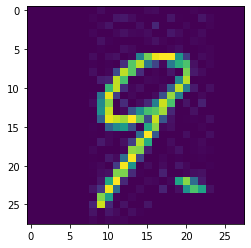

In [ ]:
# CKKS context generation.
context = create_ctx()

# Random image sampling
image, orig = load_input()

# Image encoding
encrypted_image = prepare_input(context, image)

print("Encrypted image ", encrypted_image)
print("Original image ")
imshow(np.asarray(orig))

# We prepare the context for the server, by making it public(we drop the secret key)
server_context = context.copy()
server_context.make_context_public()

# Context and ciphertext serialization
server_context = server_context.serialize()
encrypted_image = encrypted_image.serialize()


client_query = {
    "data" : encrypted_image,
    "context" : server_context,
}

In [ ]:
encrypted_query = model.prepare_input(client_query["context"], client_query["data"])
encrypted_result = model(encrypted_query).serialize()

server_response = {
    "data" : encrypted_result
}

In [ ]:
result = ts.ckks_vector_from(context, server_response["data"]).decrypt()

probs = torch.softmax(torch.tensor(result), 0)
label_max = torch.argmax(probs)
print("Maximum probability for label {}".format(label_max))

Maximum probability for label 9


## 4c. Benchmarking

- Source: [OpenMined TenSEAL Tutorial 3 - Benchmarks](https://github.com/OpenMined/TenSEAL/blob/main/tutorials/Tutorial%203%20-%20Benchmarks.ipynb)

In [ ]:
!pip -qq install tabulate

## Homomorphic Encryption Parameters Review

#### The scaling factor(CKKS)
The first step of the CKKS scheme is encoding a vector of real numbers into a plaintext polynomial.


The scaling factor defines the encoding precision for the binary representation of the number. Intuitively, we are talking about binary precision as pictured below:


<img src="assets/floating_point.png" alt="ckks-high-level" width="400"/>

#### The polynomial modulus degree (poly_modulus_degree)

The polynomial modulus($N$ in the diagram) directly affects:
 - The number of coefficients in plaintext polynomials
 - The size of ciphertext elements
 - The computational performance of the scheme (bigger is worse)
 - The security level (bigger is better).

In TenSEAL, as in Microsoft SEAL, the degree of the polynomial modulus must be a power of 2 (e.g. $1024$, $2048$, $4096$, $8192$, $16384$, or $32768$).

#### The coefficient modulus sizes

The last parameter required for the scheme is a list of binary sizes.
Using this list, SEAL will generate a list of primes of those binary sizes, called the coefficient modulus($q$ in the diagram).

The coefficient modulus directly affects:
 - The size of ciphertext elements
 - The length of the list indicates the level of the scheme(or the number of encrypted multiplications supported).
 - The security level (bigger is worse).
 
In TenSEAL, as in Microsoft SEAL, each of the prime numbers in the coefficient modulus must be at most 60 bits and must be congruent to 1 modulo 2*poly_modulus_degree.

In [ ]:
import tenseal as ts
import tenseal.sealapi as seal
import random
import pickle
import numpy as np
import math
from IPython.display import HTML, display
import tabulate
import pytest
 
def convert_size(size_bytes):
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return "%s %s" % (s, size_name[i])

enc_type_str = {
    ts.ENCRYPTION_TYPE.SYMMETRIC : "symmetric", 
    ts.ENCRYPTION_TYPE.ASYMMETRIC : "asymmetric",
}

scheme_str = {
    ts.SCHEME_TYPE.CKKS : "ckks", 
    ts.SCHEME_TYPE.BFV : "bfv",
}

def decrypt(enc):
    return enc.decrypt()

In [ ]:
#@title Context serialization { display-mode: "form" }
#@markdown The TenSEAL context is required for defining the perfomance and security of your application.
#@markdown 
#@markdown In a client-server setup, it is required only on the initial handshake, as the ciphertexts can be linked with an existing context on deserialization.
#@markdown 
#@markdown Here we are benchmarking the size of the context, depending on the input parameters.

ctx_size_benchmarks = [["Encryption Type", "Scheme Type", "Polynomial modulus", "Coefficient modulus sizes", "Saved keys", "Context serialized size", ]]

for enc_type in [ts.ENCRYPTION_TYPE.SYMMETRIC, ts.ENCRYPTION_TYPE.ASYMMETRIC]:
    for (poly_mod, coeff_mod_bit_sizes) in [
        (8192, [40, 21, 21, 21, 21, 21, 21, 40]),
        (8192, [40, 20, 40]),
        (8192, [20, 20, 20]),
        (8192, [17, 17]),
        (4096, [40, 20, 40]),
        (4096, [30, 20, 30]),
        (4096, [20, 20, 20]),
        (4096, [19, 19, 19]),
        (4096, [18, 18, 18]),
        (4096, [18, 18]),
        (4096, [17, 17]),
        (2048, [20, 20]),
        (2048, [18, 18]),
        (2048, [16, 16]),
    ]:
        context = ts.context(
            scheme=ts.SCHEME_TYPE.CKKS,
            poly_modulus_degree=poly_mod,
            coeff_mod_bit_sizes=coeff_mod_bit_sizes,
            encryption_type=enc_type,
        )
        context.generate_galois_keys()
        context.generate_relin_keys()
        
        ser = context.serialize(save_public_key=True, save_secret_key=True, save_galois_keys=True, save_relin_keys=True)
        ctx_size_benchmarks.append([enc_type_str[enc_type], scheme_str[ts.SCHEME_TYPE.CKKS], poly_mod, coeff_mod_bit_sizes, "all", convert_size(len(ser))])
        
        if enc_type is ts.ENCRYPTION_TYPE.ASYMMETRIC:
            ser = context.serialize(save_public_key=True, save_secret_key=False, save_galois_keys=False, save_relin_keys=False)
            ctx_size_benchmarks.append([enc_type_str[enc_type], scheme_str[ts.SCHEME_TYPE.CKKS], poly_mod, coeff_mod_bit_sizes, "Public key", convert_size(len(ser))])
  
        ser = context.serialize(save_public_key=False, save_secret_key=True, save_galois_keys=False, save_relin_keys=False)
        ctx_size_benchmarks.append([enc_type_str[enc_type], scheme_str[ts.SCHEME_TYPE.CKKS], poly_mod, coeff_mod_bit_sizes, "Secret key",  convert_size(len(ser))])
                                    
        ser = context.serialize(save_public_key=False, save_secret_key=False, save_galois_keys=True, save_relin_keys=False)
        ctx_size_benchmarks.append([enc_type_str[enc_type], scheme_str[ts.SCHEME_TYPE.CKKS], poly_mod, coeff_mod_bit_sizes, "Galois keys",  convert_size(len(ser))])
                                                                      
        ser = context.serialize(save_public_key=False, save_secret_key=False, save_galois_keys=False, save_relin_keys=True)
        ctx_size_benchmarks.append([enc_type_str[enc_type], scheme_str[ts.SCHEME_TYPE.CKKS], poly_mod, coeff_mod_bit_sizes, "Relin keys",  convert_size(len(ser))])
  
        ser = context.serialize(save_public_key=False, save_secret_key=False, save_galois_keys=False, save_relin_keys=False)
        ctx_size_benchmarks.append([enc_type_str[enc_type], scheme_str[ts.SCHEME_TYPE.CKKS], poly_mod, coeff_mod_bit_sizes, "none", convert_size(len(ser))])
        
    for (poly_mod, coeff_mod_bit_sizes) in [
        (8192, [40, 21, 21, 21, 21, 21, 21, 40]),
        (8192, [40, 21, 21, 21, 21, 21, 40]),
        (8192, [40, 21, 21, 21, 21, 40]),
        (8192, [40, 21, 21, 21, 40]),
        (8192, [40, 21, 21, 40]),
        (8192, [40, 20, 40]),
        (4096, [40, 20, 40]),
        (4096, [30, 20, 30]),
        (4096, [20, 20, 20]),
        (4096, [19, 19, 19]),
        (4096, [18, 18, 18]),
        (2048, [20, 20]),
    ]:
        context = ts.context(
            scheme=ts.SCHEME_TYPE.BFV,
            poly_modulus_degree=poly_mod,
            plain_modulus=786433,
            coeff_mod_bit_sizes=coeff_mod_bit_sizes,
            encryption_type=enc_type,
        )
        
        context.generate_galois_keys()
        context.generate_relin_keys()
        
        ser = context.serialize(save_public_key=True, save_secret_key=True, save_galois_keys=True, save_relin_keys=True)
        ctx_size_benchmarks.append([enc_type_str[enc_type], scheme_str[ts.SCHEME_TYPE.BFV], poly_mod, coeff_mod_bit_sizes, "all", convert_size(len(ser))])
        
        if enc_type is ts.ENCRYPTION_TYPE.ASYMMETRIC:
            ser = context.serialize(save_public_key=True, save_secret_key=False, save_galois_keys=False, save_relin_keys=False)
            ctx_size_benchmarks.append([enc_type_str[enc_type], scheme_str[ts.SCHEME_TYPE.BFV], poly_mod, coeff_mod_bit_sizes, "Public key", convert_size(len(ser))])
  
        ser = context.serialize(save_public_key=False, save_secret_key=True, save_galois_keys=False, save_relin_keys=False)
        ctx_size_benchmarks.append([enc_type_str[enc_type], scheme_str[ts.SCHEME_TYPE.BFV], poly_mod, coeff_mod_bit_sizes, "Secret key",  convert_size(len(ser))])
                                    
        ser = context.serialize(save_public_key=False, save_secret_key=False, save_galois_keys=True, save_relin_keys=False)
        ctx_size_benchmarks.append([enc_type_str[enc_type], scheme_str[ts.SCHEME_TYPE.BFV], poly_mod, coeff_mod_bit_sizes, "Galois keys",  convert_size(len(ser))])
                                                                      
        ser = context.serialize(save_public_key=False, save_secret_key=False, save_galois_keys=False, save_relin_keys=True)
        ctx_size_benchmarks.append([enc_type_str[enc_type], scheme_str[ts.SCHEME_TYPE.BFV], poly_mod, coeff_mod_bit_sizes, "Relin keys",  convert_size(len(ser))])
  
        ser = context.serialize(save_public_key=False, save_secret_key=False, save_galois_keys=False, save_relin_keys=False)
        ctx_size_benchmarks.append([enc_type_str[enc_type], scheme_str[ts.SCHEME_TYPE.BFV], poly_mod, coeff_mod_bit_sizes, "none", convert_size(len(ser))])
        

display(HTML(tabulate.tabulate(ctx_size_benchmarks, tablefmt='html')))

Encryption Type,Scheme Type,Polynomial modulus,Coefficient modulus sizes,Saved keys,Context serialized size
symmetric,ckks,8192,"[40, 21, 21, 21, 21, 21, 21, 40]",all,263.1 KB
symmetric,ckks,8192,"[40, 21, 21, 21, 21, 21, 21, 40]",Secret key,263.09 KB
symmetric,ckks,8192,"[40, 21, 21, 21, 21, 21, 21, 40]",Galois keys,86.88 MB
symmetric,ckks,8192,"[40, 21, 21, 21, 21, 21, 21, 40]",Relin keys,3.63 MB
symmetric,ckks,8192,"[40, 21, 21, 21, 21, 21, 21, 40]",none,112.0 B
symmetric,ckks,8192,"[40, 20, 40]",all,124.94 KB
symmetric,ckks,8192,"[40, 20, 40]",Secret key,124.93 KB
symmetric,ckks,8192,"[40, 20, 40]",Galois keys,11.89 MB
symmetric,ckks,8192,"[40, 20, 40]",Relin keys,505.11 KB
symmetric,ckks,8192,"[40, 20, 40]",none,92.0 B


### Context serialization interpretation

Some key points here would be:

* The symmetric encryption creates smaller contexts than the public key ones.
* Decreasing the length of the coefficient modulus decreases the size of the context but also the depth of available multiplications.
* Decreasing the coefficient modulus sizes reduces the context size, but impacts the precision as well (for CKKS).
* Galois keys increase the context size only for public contexts (without the secret key). Send them only when you need to perform ciphertext rotations on the other end.
* Relinearization keys increase the context size only for public contexts. Send them only when you need to perform multiplications on ciphertexts on the other end.
* When we send the secret key, the Relinearization/Galois key can be regenerated on the other end without sending them.

In [ ]:
#@title Ciphertext serialization { display-mode: "form" }
#@markdown We next review how different parameters impact the ciphertext serialization.
#@markdown 
#@markdown The first observation here is that the symmetric/asymmetric encryption switch doesn't actually impact the size of the ciphertext, only of the context.
#@markdown 
#@markdown We will review the benchmarks only for the asymmetric scenario.

data = [random.uniform(-10, 10) for _ in range(10 ** 3)]
network_data = pickle.dumps(data)
print("Plain data size in bytes {}".format(convert_size(len(network_data))))

enc_type = ts.ENCRYPTION_TYPE.ASYMMETRIC
ct_size_benchmarks = [["Encryption Type", "Scheme Type", "Polynomial modulus", "Coefficient modulus sizes", "Precision", "Ciphertext serialized size", "Encryption increase ratio"]]


for (poly_mod, coeff_mod_bit_sizes, prec) in [
    (8192, [60, 40, 60], 40),
    (8192, [40, 21, 21, 21, 21, 21, 21, 40], 40),
    (8192, [40, 21, 21, 21, 21, 21, 21, 40], 21),
    (8192, [40, 20, 40], 40),
    (8192, [20, 20, 20], 38),
    (8192, [60, 60], 38),
    (8192, [40, 40], 38),
    (8192, [17, 17], 15),
    (4096, [40, 20, 40], 40),
    (4096, [30, 20, 30], 40),
    (4096, [20, 20, 20], 38),
    (4096, [19, 19, 19], 35),
    (4096, [18, 18, 18], 33),
    (4096, [30, 30], 25),
    (4096, [25, 25], 20),
    (4096, [18, 18], 16),
    (4096, [17, 17], 15),
    (2048, [20, 20], 18),
    (2048, [18, 18], 16),
    (2048, [16, 16], 14),
]:
    context = ts.context(
        scheme=ts.SCHEME_TYPE.CKKS,
        poly_modulus_degree=poly_mod,
        coeff_mod_bit_sizes=coeff_mod_bit_sizes,
        encryption_type=enc_type,
    )
    scale = 2 ** prec
    ckks_vec = ts.ckks_vector(context, data, scale)
 
    enc_network_data = ckks_vec.serialize()
    ct_size_benchmarks.append([enc_type_str[enc_type], scheme_str[ts.SCHEME_TYPE.CKKS], poly_mod, coeff_mod_bit_sizes, "2**{}".format(prec),convert_size(len(enc_network_data)), round(len(enc_network_data) / len(network_data), 2)])

for (poly_mod, coeff_mod_bit_sizes) in [
    (8192, [40, 21, 21, 21, 21, 21, 21, 40]),
    (8192, [40, 21, 21, 21, 21, 21, 40]),
    (8192, [40, 21, 21, 21, 21, 40]),
    (8192, [40, 21, 21, 21, 40]),
    (8192, [40, 21, 21, 40]),
    (8192, [40, 20, 40]),
    (4096, [40, 20, 40]),
    (4096, [30, 20, 30]),
    (4096, [20, 20, 20]),
    (4096, [19, 19, 19]),
    (4096, [18, 18, 18]),
    (2048, [20, 20]),
]:
    context = ts.context(
        scheme=ts.SCHEME_TYPE.BFV,
        poly_modulus_degree=poly_mod,
        plain_modulus=786433,
        coeff_mod_bit_sizes=coeff_mod_bit_sizes,
        encryption_type=enc_type,
    )
    vec = ts.bfv_vector(context, data)
    enc_network_data = vec.serialize()
    ct_size_benchmarks.append([enc_type_str[enc_type], scheme_str[ts.SCHEME_TYPE.BFV], poly_mod, coeff_mod_bit_sizes, "-",convert_size(len(enc_network_data)), round(len(enc_network_data) / len(network_data), 2)])

    
display(HTML(tabulate.tabulate(ct_size_benchmarks, tablefmt='html')))

Plain data size in bytes 8.8 KB


Encryption Type,Scheme Type,Polynomial modulus,Coefficient modulus sizes,Precision,Ciphertext serialized size,Encryption increase ratio
asymmetric,ckks,8192,"[60, 40, 60]",2**40,229.8 KB,26.12
asymmetric,ckks,8192,"[40, 21, 21, 21, 21, 21, 21, 40]",2**40,427.94 KB,48.65
asymmetric,ckks,8192,"[40, 21, 21, 21, 21, 21, 21, 40]",2**21,428.65 KB,48.73
asymmetric,ckks,8192,"[40, 20, 40]",2**40,153.3 KB,17.43
asymmetric,ckks,8192,"[20, 20, 20]",2**38,104.52 KB,11.88
asymmetric,ckks,8192,"[60, 60]",2**38,128.14 KB,14.57
asymmetric,ckks,8192,"[40, 40]",2**38,92.15 KB,10.48
asymmetric,ckks,8192,"[17, 17]",2**15,38.17 KB,4.34
asymmetric,ckks,4096,"[40, 20, 40]",2**40,78.97 KB,8.98
asymmetric,ckks,4096,"[30, 20, 30]",2**40,66.25 KB,7.53


### Ciphertext serialization interpretation
Some observations are:
* The polynomial modulus increase results in a ciphertext increase.
* The length of coefficient modulus sizes impacts the ciphertext size.
* The values of the coefficient modulus sizes impact the ciphertext size, as well as the precision.
* For a fixed set of polynomial modulus and coefficient modulus sizes, changing the precision doesn't affect the ciphertext size.

In [ ]:
#@title Understanding the ciphertext precision impact { display-mode: "form" }


data = [ random.random()]

enc_type = ts.ENCRYPTION_TYPE.ASYMMETRIC
ct_size_benchmarks = [["Value range", "Polynomial modulus", "Coefficient modulus sizes", "Precision", "Operation", "Status"]]


for data_pow in [-1, 0, 1, 5, 11, 21, 41, 51]:
    data = [ random.uniform(2 ** data_pow, 2 ** (data_pow + 1))]
    for (poly_mod, coeff_mod_bit_sizes, prec) in [
        (8192, [60, 40, 60], 40),
        (8192, [40, 21, 21, 21, 21, 21, 21, 40], 40),
        (8192, [40, 21, 21, 21, 21, 21, 21, 40], 21),
        (8192, [40, 20, 40], 40),
        (8192, [20, 20, 20], 38),
        (8192, [60, 60], 38),
        (8192, [40, 40], 38),
        (8192, [17, 17], 15),
        (4096, [40, 20, 40], 40),
        (4096, [30, 20, 30], 40),
        (4096, [20, 20, 20], 38),
        (4096, [19, 19, 19], 35),
        (4096, [18, 18, 18], 33),
        (4096, [30, 30], 25),
        (4096, [25, 25], 20),
        (4096, [18, 18], 16),
        (4096, [17, 17], 15),
        (2048, [20, 20], 18),
        (2048, [18, 18], 16),
        (2048, [16, 16], 14),
    ]:
        val_str = "[2^{} - 2^{}]".format(data_pow, data_pow + 1)
        context = ts.context(
            scheme=ts.SCHEME_TYPE.CKKS,
            poly_modulus_degree=poly_mod,
            coeff_mod_bit_sizes=coeff_mod_bit_sizes,
            encryption_type=enc_type,
        )
        scale = 2 ** prec
        try:
            ckks_vec = ts.ckks_vector(context, data, scale)
        except BaseException as e:
            ct_size_benchmarks.append([val_str, poly_mod, coeff_mod_bit_sizes, "2**{}".format(prec), "encrypt", "encryption failed"])
            continue
    
        decrypted = decrypt(ckks_vec)
        for dec_prec in reversed(range(prec)):
            if pytest.approx(decrypted, abs=2 ** -dec_prec) == data:
                ct_size_benchmarks.append([val_str, poly_mod, coeff_mod_bit_sizes, "2**{}".format(prec), "encrypt", "decryption prec 2 ** {}".format(-dec_prec)])
                break
        ckks_sum = ckks_vec + ckks_vec
        decrypted = decrypt(ckks_sum)
        for dec_prec in reversed(range(prec)):
            if pytest.approx(decrypted, abs=2 ** -dec_prec) == [data[0] + data[0]]:
                ct_size_benchmarks.append([val_str, poly_mod, coeff_mod_bit_sizes, "2**{}".format(prec), "sum", "decryption prec 2 ** {}".format(-dec_prec)])
                break
                

# We add more depth for the multiplication scenario
for data_pow in [-1, 0, 1, 5, 11, 21, 41, 51]:
    data = [ random.uniform(2 ** data_pow, 2 ** (data_pow + 1))]
    for (poly_mod, coeff_mod_bit_sizes, prec) in [
        (8192, [60, 40, 40, 60], 40),
        (8192, [40, 21, 21, 40], 40),
        (8192, [40, 21, 21, 40], 21),
        (8192, [40, 20, 20, 40], 40),
        (8192, [20, 20, 20], 38),
        (4096, [40, 20, 40], 40),
        (4096, [30, 20, 30], 40),
        (4096, [20, 20, 20], 38),
        (4096, [19, 19, 19], 35),
        (4096, [18, 18, 18], 33),
        (4096, [30, 30, 30], 25),
        (4096, [25, 25, 25], 20),
        (4096, [18, 18, 18], 16),
        (2048, [18, 18, 18], 16),
    ]:
        val_str = "[2^{} - 2^{}]".format(data_pow, data_pow + 1)
        context = ts.context(
            scheme=ts.SCHEME_TYPE.CKKS,
            poly_modulus_degree=poly_mod,
            coeff_mod_bit_sizes=coeff_mod_bit_sizes,
            encryption_type=enc_type,
        )
        scale = 2 ** prec
        try:
            ckks_vec = ts.ckks_vector(context, data, scale)
        except BaseException as e:
            continue
                
        try:
            ckks_mul = ckks_vec * ckks_vec
        except:
            ct_size_benchmarks.append([val_str, poly_mod, coeff_mod_bit_sizes, "2**{}".format(prec), "mul", "failed"])
            continue
        decrypted = decrypt(ckks_mul)
        for dec_prec in reversed(range(prec)):
            if pytest.approx(decrypted, abs=2 ** -dec_prec) == [data[0] * data[0]]:
                ct_size_benchmarks.append([val_str, poly_mod, coeff_mod_bit_sizes, "2**{}".format(prec), "mul", "decryption prec 2 ** {}".format(-dec_prec)])
                break
                
display(HTML(tabulate.tabulate(ct_size_benchmarks, tablefmt='html')))

Value range,Polynomial modulus,Coefficient modulus sizes,Precision,Operation,Status
[2^-1 - 2^0],8192,"[60, 40, 60]",2**40,encrypt,decryption prec 2 ** -30
[2^-1 - 2^0],8192,"[60, 40, 60]",2**40,sum,decryption prec 2 ** -29
[2^-1 - 2^0],8192,"[40, 21, 21, 21, 21, 21, 21, 40]",2**40,encrypt,decryption prec 2 ** -29
[2^-1 - 2^0],8192,"[40, 21, 21, 21, 21, 21, 21, 40]",2**40,sum,decryption prec 2 ** -28
[2^-1 - 2^0],8192,"[40, 21, 21, 21, 21, 21, 21, 40]",2**21,encrypt,decryption prec 2 ** -15
[2^-1 - 2^0],8192,"[40, 21, 21, 21, 21, 21, 21, 40]",2**21,sum,decryption prec 2 ** -14
[2^-1 - 2^0],8192,"[40, 20, 40]",2**40,encrypt,decryption prec 2 ** -31
[2^-1 - 2^0],8192,"[40, 20, 40]",2**40,sum,decryption prec 2 ** -30
[2^-1 - 2^0],8192,"[20, 20, 20]",2**38,encrypt,decryption prec 2 ** -27
[2^-1 - 2^0],8192,"[60, 60]",2**38,encrypt,decryption prec 2 ** -26


## A WARNING ABOUT HOMOMORPHIC ENCRYPTION

Your encrypted system is only as secure as your keys.

![](https://imgs.xkcd.com/comics/security.png)